**Chapter 10 – Introduction to Artificial Neural Networks with Keras**

Homework notebook

### 학번:  20180624

### 이름:  최서호

#### tested on google colab

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# to use tf.keras as 2.x (3.x only works on tf 2.16)
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

In [3]:
# Python ≥3.7 is required
import sys
print("Python: ", sys.version_info)
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
print(sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.8.0 is required
import tensorflow as tf
print("TF version: ", tf.__version__)
assert version.parse(tf.__version__) >= version.parse("2.8.0")

# Common imports
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Where to save the figures
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Python:  sys.version_info(major=3, minor=9, micro=19, releaselevel='final', serial=0)
1.4.1.post1
TF version:  2.15.0


In [ ]:
# as ex 10.1 requires keras api 3, we'll need to upgrade keras
# restart required
import keras

if version.parse(keras.__version__) < version.parse("3.0.0"):
    !pip3 install --upgrade keras

keras.__version__

### Exercise 10.1
Define and plot activation functions ELU, leaky ReLU and ReLU6 using keras.activation functions.  
Refer to practice code and copy all the necessary codes


2024-04-08 03:31:12.585244: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: UNKNOWN ERROR (100)


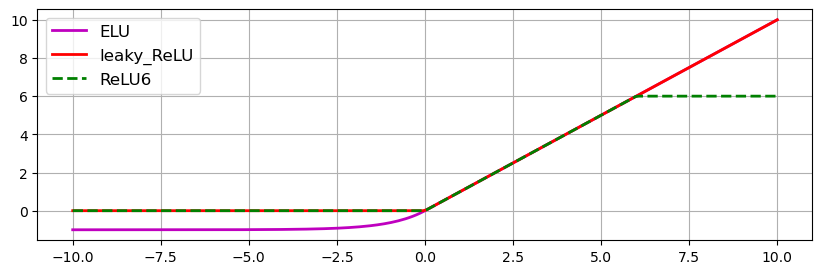

In [3]:
# Exercise 10.1
# Define activation functions using keras.activations
z = np.linspace(-10, 10, 200)

import keras

ELU = keras.activations.elu(z)
leaky_ReLU = keras.activations.relu(z)
ReLU6 = keras.activations.relu6(z)

# Plot

plt.figure(figsize=(10,3))
plt.plot(z, ELU, "m-", linewidth=2, label="ELU")
plt.plot(z, leaky_ReLU, "r-", linewidth=2, label="leaky_ReLU")
plt.plot(z, ReLU6, "g--", linewidth=2, label="ReLU6")
plt.grid(True)
plt.legend(fontsize=12)

plt.show()

### Exercise 10.2  
Fashion MNIST 실습코드를 이용하여 아래에서 요구하는 hidden layer의 수와 neuron의 수를 갖는 MLP 모델을 구성하고 학습시킨후 training loss와 test accuracy, step당 학습시간, 파라미터의 크기를 비교하시오. 모든 경우 learning curve를 그리시오.
1. (300, 300, 100)
2. (300, 100, 30)
3. (1000, 100)
4. (300, 30)
5. (100, 30)
6. 위의 실습 코드 결과와 함께 결과를 비교하고 분석하시오. 

In [4]:
# Ex10.2
# Preparation codes

# load dataset

fashion_mnist = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

# just to check
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# set seed
tf.random.set_seed(42)


In [5]:
#1

# 300, 300, 100 to each layer

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Input(shape=(28, 28)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(300, activation="relu"))
model1.add(tf.keras.layers.Dense(300, activation="relu"))
model1.add(tf.keras.layers.Dense(100, activation="relu"))
model1.add(tf.keras.layers.Dense(10, activation="softmax"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 356910 (1.36 MB)
Trainable params: 356910 (1.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# train the model

model1.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])

history1 = model1.fit(X_train, y_train, epochs=30,
                      validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 2ms/step - loss: 0.7162 - accuracy: 0.7643 - val_loss: 0.4902 - val_accuracy: 0.8284
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4731 - accuracy: 0.8341 - val_loss: 0.4699 - val_accuracy: 0.8304
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4236 - accuracy: 0.8503 - val_loss: 0.4172 - val_accuracy: 0.8498
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3960 - accuracy: 0.8605 - val_loss: 0.3839 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3736 - accuracy: 0.8675 - val_loss: 0.3737 - val_accuracy: 0.8640
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3563 - accuracy: 0.8727 - val_loss: 0.3779 - val_accuracy: 0.8646
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3432 - accuracy: 0.8752 - val_loss: 0.3586 - val_accuracy:

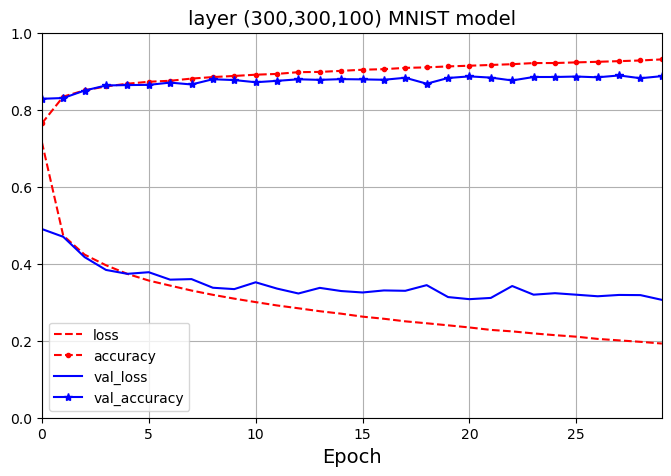

In [7]:
# show model

pd.DataFrame(history1.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left", fontsize = 10)
plt.title("layer (300,300,100) MNIST model")
plt.show()

In [34]:
# test result

model1.evaluate(X_test,y_test)

313/313 [==============================] - 0s 907us/step - loss: 0.3189 - accuracy: 0.8894


[0.3189198970794678, 0.8894000053405762]

In [8]:
#2

# 300, 100, 30 to each layer

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Input(shape=(28, 28)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(300, activation="relu"))
model2.add(tf.keras.layers.Dense(100, activation="relu"))
model2.add(tf.keras.layers.Dense(30, activation="relu"))
model2.add(tf.keras.layers.Dense(100, activation="softmax"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 30)                3030      
                                                                 
 dense_7 (Dense)             (None, 100)               3100      
                                                                 
Total params: 271730 (1.04 MB)
Trainable params: 271730 (1.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# train the model

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history2 = model2.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9481 - accuracy: 0.6855 - val_loss: 0.5465 - val_accuracy: 0.8094
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5295 - accuracy: 0.8132 - val_loss: 0.4885 - val_accuracy: 0.8198
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4630 - accuracy: 0.8370 - val_loss: 0.4392 - val_accuracy: 0.8460
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4287 - accuracy: 0.8493 - val_loss: 0.4049 - val_accuracy: 0.8588
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4002 - accuracy: 0.8585 - val_loss: 0.4016 - val_accuracy: 0.8564
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3799 - accuracy: 0.8636 - val_loss: 0.3877 - val_accuracy: 0.8630
Epoch 7/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3646 - accuracy: 0.8673 - val_loss: 0.3715 - val_accuracy:

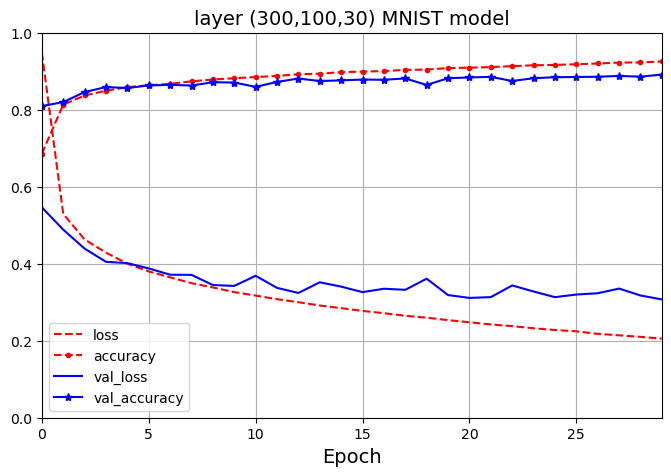

In [10]:
# show model

pd.DataFrame(history2.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left", fontsize = 10)
plt.title("layer (300,100,30) MNIST model")
plt.show()

In [35]:
# test result

model2.evaluate(X_test,y_test)

313/313 [==============================] - 0s 935us/step - loss: 0.3266 - accuracy: 0.8867


[0.3266007900238037, 0.8866999745368958]

In [11]:
#3

# 1000, 100 to each layer

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Input(shape=(28, 28)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(1000, activation="relu"))
model3.add(tf.keras.layers.Dense(100, activation="relu"))
model3.add(tf.keras.layers.Dense(10, activation="softmax"))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 1000)              785000    
                                                                 
 dense_9 (Dense)             (None, 100)               100100    
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 886110 (3.38 MB)
Trainable params: 886110 (3.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# train the model

model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history3 = model3.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.6833 - accuracy: 0.7768 - val_loss: 0.4855 - val_accuracy: 0.8326
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4708 - accuracy: 0.8362 - val_loss: 0.4509 - val_accuracy: 0.8372
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4273 - accuracy: 0.8501 - val_loss: 0.4093 - val_accuracy: 0.8556
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4031 - accuracy: 0.8599 - val_loss: 0.3818 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3830 - accuracy: 0.8652 - val_loss: 0.3795 - val_accuracy: 0.8626
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3665 - accuracy: 0.8708 - val_loss: 0.3794 - val_accuracy: 0.8680
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3534 - accuracy: 0.8739 - val_loss: 0.3583 - val_accuracy:

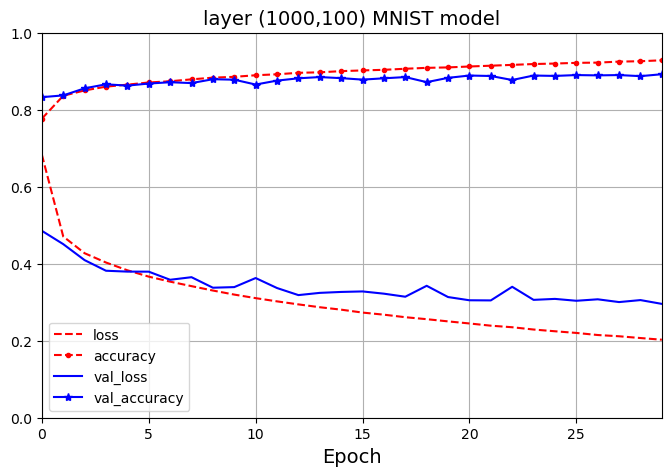

In [13]:
# show model

pd.DataFrame(history3.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left", fontsize = 10)
plt.title("layer (1000,100) MNIST model")
plt.show()

In [36]:
# test result

model3.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3161 - accuracy: 0.8891


[0.3161049783229828, 0.8891000151634216]

In [14]:
#4

# 300, 30 to each layer

model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Input(shape=(28, 28)))
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(300, activation="relu"))
model4.add(tf.keras.layers.Dense(30, activation="relu"))
model4.add(tf.keras.layers.Dense(10, activation="softmax"))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 300)               235500    
                                                                 
 dense_12 (Dense)            (None, 30)                9030      
                                                                 
 dense_13 (Dense)            (None, 10)                310       
                                                                 
Total params: 244840 (956.41 KB)
Trainable params: 244840 (956.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# train the model

model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history4 = model4.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7351 - accuracy: 0.7558 - val_loss: 0.5196 - val_accuracy: 0.8238
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4970 - accuracy: 0.8272 - val_loss: 0.4723 - val_accuracy: 0.8286
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4502 - accuracy: 0.8415 - val_loss: 0.4314 - val_accuracy: 0.8466
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4255 - accuracy: 0.8500 - val_loss: 0.4072 - val_accuracy: 0.8580
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4039 - accuracy: 0.8580 - val_loss: 0.4048 - val_accuracy: 0.8578
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3870 - accuracy: 0.8639 - val_loss: 0.4038 - val_accuracy: 0.8598
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3738 - accuracy: 0.8689 - val_loss: 0.3726 - val_accuracy:

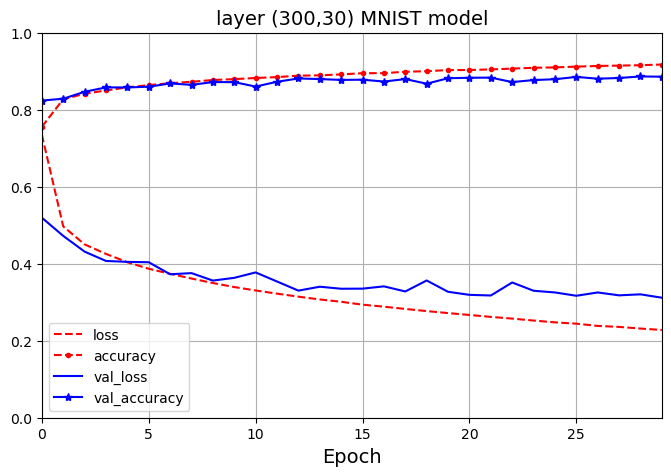

In [16]:
# show model

pd.DataFrame(history4.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left", fontsize = 10)
plt.title("layer (300,30) MNIST model")
plt.show()

In [37]:
# test result

model4.evaluate(X_test,y_test)

313/313 [==============================] - 0s 808us/step - loss: 0.3245 - accuracy: 0.8843


[0.3245372176170349, 0.8842999935150146]

In [17]:
#5

# 100, 30 to each layer

model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Input(shape=(28, 28)))
model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(100, activation="relu"))
model5.add(tf.keras.layers.Dense(30, activation="relu"))
model5.add(tf.keras.layers.Dense(10, activation="softmax"))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 30)                3030      
                                                                 
 dense_16 (Dense)            (None, 10)                310       
                                                                 
Total params: 81840 (319.69 KB)
Trainable params: 81840 (319.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# train the model

model5.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history5 = model5.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7624 - accuracy: 0.7461 - val_loss: 0.5159 - val_accuracy: 0.8246
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5008 - accuracy: 0.8264 - val_loss: 0.4640 - val_accuracy: 0.8332
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4532 - accuracy: 0.8411 - val_loss: 0.4306 - val_accuracy: 0.8482
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4281 - accuracy: 0.8494 - val_loss: 0.4079 - val_accuracy: 0.8542
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4077 - accuracy: 0.8575 - val_loss: 0.4022 - val_accuracy: 0.8550
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3923 - accuracy: 0.8615 - val_loss: 0.4113 - val_accuracy: 0.8536
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3810 - accuracy: 0.8650 - val_loss: 0.3796 - val_accuracy:

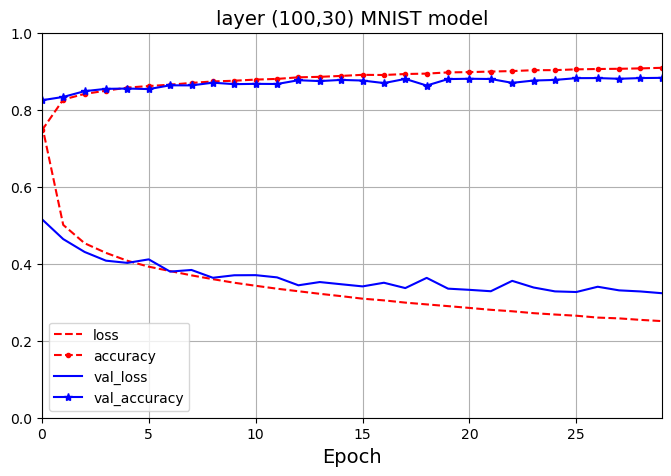

In [19]:
# show model

pd.DataFrame(history5.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left", fontsize = 10)
plt.title("layer (100,30) MNIST model")
plt.show()

In [38]:
# test result

model5.evaluate(X_test,y_test)

313/313 [==============================] - 0s 736us/step - loss: 0.3443 - accuracy: 0.8778


[0.34430262446403503, 0.8777999877929688]

### #6  **결과 분석**

1. 학습 시간
학습 시간은 param의 수에 비례하여 증가함을 확인 할 수가 있다. 예를 들어 model1은 총 param의 개수가 356910개 일 때 step 당 평균적으로 3s의 시간이 걸렸는데,
총 886110개의 param을 가진 model3는 평균 4s이 결렸다.

2. training loss
모든 model이 epoch이 진행됨에 따라 계속해서 loss가 감소함을 확인 할 수 있었다. 여기서는 30 epoch 까지만 진행하였지만, 더 진행하면 loss가 더 감소할 것으로 생각된다.

3. test accuracy
**model1: 0.8894
model2: 0.8867
model3: 0.8891
model4: 0.8843
model5: 0.8778**
hidden layer (300,300,100)을 가진 model1이 가장 좋은 결과를 내었다. param 수보다는 layer의 수에 좀 더 많은 영향을 받는 것으로 보인다.

### Exercise 10.3  

Refer the previous cells. 
Plot the loss curves and obtain mse_test values for the following learning rates and epochs
1) 2e-3, epoch = 5  
2) 2e-3, epoch = 10  
3) 1e-3, epoch = 10  
4) 5e-4, epoch = 10  
5) 5e-4, epoch = 20     
Discuss the results for the above hyperparameters.

In [44]:
# Model definition

# we'll use the model with the best result; which is, model1 with (300, 300, 100)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [46]:
# 1,2,3,4,5 compile -> fit

model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3),
              metrics=["accuracy"])

model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3),
              metrics=["accuracy"])

model_3.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

model_4.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4),
              metrics=["accuracy"])

model_5.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4),
              metrics=["accuracy"])

history_1 = model_1.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

print("\n\n")

history_2 = model_2.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

print("\n\n")

history_3 = model_3.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

print("\n\n")

history_4 = model_4.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

print("\n\n")

history_5 = model_5.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4731 - accuracy: 0.8361 - val_loss: 0.4594 - val_accuracy: 0.8392
Epoch 2/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4566 - accuracy: 0.8414 - val_loss: 0.4466 - val_accuracy: 0.8398
Epoch 3/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4428 - accuracy: 0.8461 - val_loss: 0.4297 - val_accuracy: 0.8496
Epoch 4/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4326 - accuracy: 0.8512 - val_loss: 0.4208 - val_accuracy: 0.8532
Epoch 5/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4224 - accuracy: 0.8551 - val_loss: 0.4151 - val_accuracy: 0.8554

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4093 - accuracy: 0.8584 - val_loss: 0.4177 - val_accuracy: 0.8516
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4025 - accuracy: 0.8608 - val_loss: 0.4018 - val_accuracy: 0.8

In [52]:
# get test results

print(f"test results([loss, accuracy]):\n1. {np.round(model_1.evaluate(X_test,y_test),2)}\n"
      f"2. {np.round(model_2.evaluate(X_test,y_test),2)}\n"
      f"3. {np.round(model_3.evaluate(X_test,y_test),2)}\n"
      f"4. {np.round(model_4.evaluate(X_test,y_test),2)}\n"
      f"5. {np.round(model_5.evaluate(X_test,y_test),2)}")

313/313 [==============================] - 0s 908us/step - loss: 0.4997 - accuracy: 0.8263
test results([loss, accuracy]):
1. [0.45 0.84]
2. [0.4  0.86]
3. [0.47 0.83]
4. [0.58 0.8 ]
5. [0.5  0.83]


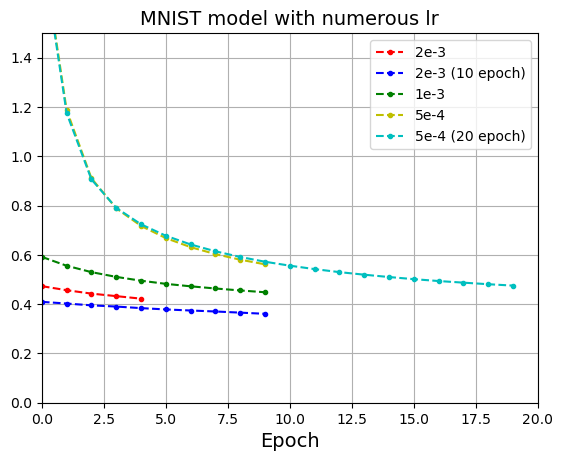

In [70]:
# plot each model


plt.plot(history_1.history['loss'], 'r--.', label = '2e-3')
plt.plot(history_2.history['loss'], 'b--.', label = '2e-3 (10 epoch)')
plt.plot(history_3.history['loss'], 'g--.', label = '1e-3')
plt.plot(history_4.history['loss'], 'y--.', label = '5e-4')
plt.plot(history_5.history['loss'], 'c--.', label = '5e-4 (20 epoch)')
plt.grid(True)
plt.xlabel("Epoch")
plt.xlim([0,20])
plt.ylim([0,1.5])
plt.legend(fontsize = 10)
plt.title("MNIST model with numerous lr")
plt.show()

### #6 Discussion

lr 값이 작아짐에 따라 초기 loss 값이 증가한다.
다만 epoch이 진행됨에 따라 모든 loss 값이 감소함을 보인다. 결국 loss function 및 model이 동일하므로 각자 충분한 epoch 이후로 모두 같은 loss를 보일 것으로 생각된다.

### Exercise 10.4
아래의 파라미터를 갖는 fully-connected network에 대해 다음 물음에 답하시오  
Number of input features: Nf  
Number of neurons in ith hidden nodes: Nni  
Number of hidden layers: Nh  
Number of output node: No  

1. MAC(multiply and addition) operation의 수를 위에서 주어진 파라미터를 이용하여 식으로 표현하시오. 단, Nh=3이다.  
2. 위의 california housing dataset에 대해 Nh=3, Nn1=Nn2=Nn3=30일 때 30 epoch 동안 학습후 loss, val_loss, mse_test값을 구하시오. Hyperparameter는 Regression MLP의 실습 코드와 같은 값을 이용한다. Tensorboard를 위해 log10 directory에 get_log_dir 함수를 이용하여 subdirectory를 생성하시오.  
3. Nh=2일 때 MAC operation 수가 최대한 비슷하도록 Nn1=Nn2를 구하고 2와 같은 조건으로 학습시키고 loss, val_loss, mse_test값을 구하시오.
4. Nh=1일 때 MAC operation 수가 최대한 비슷하도록 Nn1을 구하고 2와 같은 조건으로 학습시키고 loss, val_loss, mse_test값을 구하시오.  
5. 2-4번의 결과를 비교하고 분석하시오. 또한 Tensorboard에서 learning curve를 비교하시오.

#1. Number of MAC operations   
#Answer: $Nf * Nn1 + Nn1 * Nn2 + Nn2 * Nn3 + Nn3 * No$


In [4]:
import shutil

# background jobs for tensorboard

if "google.colab" in sys.modules:
    %pip install -q -U tensorboard-plugin-profile
    
shutil.rmtree("my_logs", ignore_errors=True)

from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [6]:
#2.

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# get dataset

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

tf.random.set_seed(42)

# 3 -> (30,30,30) -> 1

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model_housing1 = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer_housing1 = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_housing1.compile(loss="mse", optimizer=optimizer_housing1, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
# history_housing = model_housing.fit(X_train, y_train, epochs=30,
#                     validation_data=(X_valid, y_valid))
# mse_test, rmse_test = model_housing.evaluate(X_test, y_test)

In [7]:
# save for later tensorboard

tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history_housing1 = model_housing1.fit(X_train, y_train, epochs=30,
                                    validation_data=(X_valid, y_valid),
                                    callbacks=[tensorboard_cb])

2024-04-08 16:16:44.915085: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-04-08 16:16:44.915125: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-04-08 16:16:44.915164: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1883] Profiler found 1 GPUs
2024-04-08 16:16:44.915638: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:137] cuptiGetTimestamp: error 999: 
2024-04-08 16:16:44.915674: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:186] cuptiSubscribe: ignored due to a previous error.
2024-04-08 16:16:44.915680: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
2024-04-08 16:16:44.915684: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1935] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with

Epoch 1/30


2024-04-08 16:16:52.676204: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f66fc003d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-08 16:16:52.676258: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-04-08 16:16:52.681632: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-08 16:16:52.693595: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1712560612.752927   14560 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


140/363 [==========>...................] - ETA: 1s - loss: 1.8504 - root_mean_squared_error: 1.3603

2024-04-08 16:16:53.749187: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-04-08 16:16:53.749224: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-04-08 16:16:53.749236: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: ignored due to a previous error.
2024-04-08 16:16:53.749240: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:186] cuptiSubscribe: ignored due to a previous error.
2024-04-08 16:16:53.749242: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
2024-04-08 16:16:53.749244: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1935] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 


221/363 [=================>............] - ETA: 0s - loss: 1.4064 - root_mean_squared_error: 1.1859

2024-04-08 16:16:54.236195: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-04-08 16:16:54.237735: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:142] cuptiFinalize: ignored due to a previous error.
2024-04-08 16:16:54.237778: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
2024-04-08 16:16:54.237783: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:2026] function cupti_interface_->Finalize()failed with error 
2024-04-08 16:16:54.272901: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: ignored due to a previous error.
2024-04-08 16:16:54.272986: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: ignored due to a previous error.
2024-04-08 16:16:54.272996: I external/local_xla/xla/backends/profiler/gpu/cupti_collector.cc:541]  GpuT

363/363 [==============================] - 11s 7ms/step - loss: 1.0624 - root_mean_squared_error: 1.0307 - val_loss: 0.4785 - val_root_mean_squared_error: 0.6917
Epoch 2/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4240 - root_mean_squared_error: 0.6512 - val_loss: 0.9170 - val_root_mean_squared_error: 0.9576
Epoch 3/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3788 - root_mean_squared_error: 0.6154 - val_loss: 0.6230 - val_root_mean_squared_error: 0.7893
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3607 - root_mean_squared_error: 0.6006 - val_loss: 0.6726 - val_root_mean_squared_error: 0.8201
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3474 - root_mean_squared_error: 0.5894 - val_loss: 1.1287 - val_root_mean_squared_error: 1.0624
Epoch 6/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3420 - root_mean_squared_error: 0.5848 - val_loss: 0.6048 - val_root_mean_

In [8]:
model_housing1.evaluate(X_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.2880 - root_mean_squared_error: 0.5366


[0.2879655659198761, 0.5366242527961731]

In [9]:
#3
# number of MAC operation for 3 hidden layers : 
# 8 x 30 + 30 x 30 + 30 x 30 + 30 x 1 = 2070
# number of MAC operation for 2 hidden layers : 
# 8 x n + n x n  + n x 1 = 2070 -> n = 41
# thank you stranger! 41 it is then!

model_housing2 = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(41, activation="relu"),
    tf.keras.layers.Dense(41, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer_housing2 = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_housing2.compile(loss="mse", optimizer=optimizer_housing2, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

history_housing2 = model_housing2.fit(X_train, y_train, epochs=30,
                                    validation_data=(X_valid, y_valid),
                                    callbacks=[tensorboard_cb])


Epoch 1/30
133/363 [=========>....................] - ETA: 1s - loss: 1.8350 - root_mean_squared_error: 1.3546

2024-04-08 16:22:05.872317: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-04-08 16:22:05.872360: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-04-08 16:22:05.872378: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: ignored due to a previous error.
2024-04-08 16:22:05.872383: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:186] cuptiSubscribe: ignored due to a previous error.
2024-04-08 16:22:05.872386: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
2024-04-08 16:22:05.872389: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1935] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 


219/363 [=================>............] - ETA: 0s - loss: 1.3576 - root_mean_squared_error: 1.1651

2024-04-08 16:22:06.391886: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-04-08 16:22:06.394692: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:142] cuptiFinalize: ignored due to a previous error.
2024-04-08 16:22:06.394733: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
2024-04-08 16:22:06.394738: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:2026] function cupti_interface_->Finalize()failed with error 
2024-04-08 16:22:06.425356: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: ignored due to a previous error.
2024-04-08 16:22:06.425412: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: ignored due to a previous error.
2024-04-08 16:22:06.425421: I external/local_xla/xla/backends/profiler/gpu/cupti_collector.cc:541]  GpuT

363/363 [==============================] - 4s 7ms/step - loss: 1.0113 - root_mean_squared_error: 1.0057 - val_loss: 0.5119 - val_root_mean_squared_error: 0.7155
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4109 - root_mean_squared_error: 0.6410 - val_loss: 1.1567 - val_root_mean_squared_error: 1.0755
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3842 - root_mean_squared_error: 0.6198 - val_loss: 0.3814 - val_root_mean_squared_error: 0.6175
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3643 - root_mean_squared_error: 0.6035 - val_loss: 0.9569 - val_root_mean_squared_error: 0.9782
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3580 - root_mean_squared_error: 0.5984 - val_loss: 0.7166 - val_root_mean_squared_error: 0.8465
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3421 - root_mean_squared_error: 0.5849 - val_loss: 0.6569 - val_root_mean_s

In [10]:
model_housing2.evaluate(X_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.2926 - root_mean_squared_error: 0.5409


[0.2926132380962372, 0.5409373641014099]

In [11]:
#4
# number of MAC operation for 1 hidden layers : 
# 8 x n + n x 1 = 2070 -> n = 230
# thank you stranger! 230 it is then!

model_housing3 = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(230, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer_housing3 = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_housing3.compile(loss="mse", optimizer=optimizer_housing3, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

history_housing3 = model_housing3.fit(X_train, y_train, epochs=30,
                                    validation_data=(X_valid, y_valid),
                                    callbacks=[tensorboard_cb])



Epoch 1/30
135/363 [==========>...................] - ETA: 1s - loss: 1.5729 - root_mean_squared_error: 1.2541

2024-04-08 16:23:40.790380: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-04-08 16:23:40.790416: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-04-08 16:23:40.790430: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: ignored due to a previous error.
2024-04-08 16:23:40.790434: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:186] cuptiSubscribe: ignored due to a previous error.
2024-04-08 16:23:40.790436: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
2024-04-08 16:23:40.790439: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1935] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 


223/363 [=================>............] - ETA: 0s - loss: 1.1833 - root_mean_squared_error: 1.0878

2024-04-08 16:23:41.249817: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-04-08 16:23:41.252526: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:142] cuptiFinalize: ignored due to a previous error.
2024-04-08 16:23:41.252563: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
2024-04-08 16:23:41.252568: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:2026] function cupti_interface_->Finalize()failed with error 
2024-04-08 16:23:41.280651: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: ignored due to a previous error.
2024-04-08 16:23:41.280708: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:135] cuptiGetTimestamp: ignored due to a previous error.
2024-04-08 16:23:41.280718: I external/local_xla/xla/backends/profiler/gpu/cupti_collector.cc:541]  GpuT

363/363 [==============================] - 3s 6ms/step - loss: 0.9155 - root_mean_squared_error: 0.9568 - val_loss: 1.4262 - val_root_mean_squared_error: 1.1942
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4231 - root_mean_squared_error: 0.6505 - val_loss: 3.0023 - val_root_mean_squared_error: 1.7327
Epoch 3/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4208 - root_mean_squared_error: 0.6487 - val_loss: 0.7390 - val_root_mean_squared_error: 0.8597
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3679 - root_mean_squared_error: 0.6065 - val_loss: 0.6363 - val_root_mean_squared_error: 0.7977
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3663 - root_mean_squared_error: 0.6052 - val_loss: 2.5554 - val_root_mean_squared_error: 1.5986
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3712 - root_mean_squared_error: 0.6092 - val_loss: 3.7040 - val_root_mean_s

In [12]:
model_housing3.evaluate(X_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3061 - root_mean_squared_error: 0.5533


[0.30612361431121826, 0.5532843470573425]

In [13]:
# check

print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2024_04_08_16_14_46
    plugins
      profile
        2024_04_08_16_16_54
          DESKTOP-GN6TMN5.xplane.pb
        2024_04_08_16_22_06
          DESKTOP-GN6TMN5.xplane.pb
        2024_04_08_16_23_41
          DESKTOP-GN6TMN5.xplane.pb
    train
      events.out.tfevents.1712560604.DESKTOP-GN6TMN5.14348.0.v2
      events.out.tfevents.1712560924.DESKTOP-GN6TMN5.14348.2.v2
      events.out.tfevents.1712561019.DESKTOP-GN6TMN5.14348.4.v2
    validation
      events.out.tfevents.1712560615.DESKTOP-GN6TMN5.14348.1.v2
      events.out.tfevents.1712560927.DESKTOP-GN6TMN5.14348.3.v2
      events.out.tfevents.1712561022.DESKTOP-GN6TMN5.14348.5.v2


In [14]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

Launching TensorBoard...

#5

## 결과 분석
각 layer와 loss / rmse 를 보면
1. (30,30,30) : **0.2880, 0.5366**
2. (41,41) : **0.2926, 0.5409**
3. (230) : **0.3061, 0.5533**

으로, 연산량이 같음에도 hidden layer 층수가 줄어들수록 오차율이 증가함을 확인 할 수가 있다.
추가로 tensorboard를 통해 learning curve를 확인해 보면 모두 train과 validation 사이에 값이 차이가 큰 것을 확인할 수가 있다(overfit).
그리고 step에 따라 validation 쪽의 값이 매우 크게 요동치는 것을 확인할 수가 있는데, 확실하지는 않지만 validation 쪽 dataset 값들이 표준편차가 큰 것으로 추정된다.


In [15]:
tf.keras.backend.clear_session()

In [20]:
import keras

version.parse(keras.__version__) >= version.parse("3.0.0")

True